# Data preprocessing

Let's start first by loading the data

Let's import the libraries needed for the next steps

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [157]:
train_dir = 'datasets/asl_alphabet/train'
val_dir = 'datasets/asl_alphabet/val'
test_dir  = 'datasets/asl_alphabet/test'

In [181]:
batch_size = 128
target_size = (32, 32)  # dataset pic = 200x200

# Define the transformations
train_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(target_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=45),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

val_test_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(target_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Let's check the number of classes and classes we have

In [182]:
labels = train_dataset.classes
print("Size: ", len(labels))
print(labels)

Size:  29
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


Let's check that the images have loaded in correctly by displaying some examples

In [170]:
def imshow(ax, img, label):
    img = img / 2 + 0.5 
    np_img = img.numpy()
    ax.imshow(np_img[0], cmap='grey')
    ax.set_title(f"Label: {train_dataset.classes[label]}")
    ax.axis('off')

In [171]:
def show_samples(loader):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    fig, axes = plt.subplots(1, 6, figsize=(12, 6)) 
    for i in range(6):
        ax = axes[i]
        imshow(ax, images[i], labels[i])
        
    plt.show()

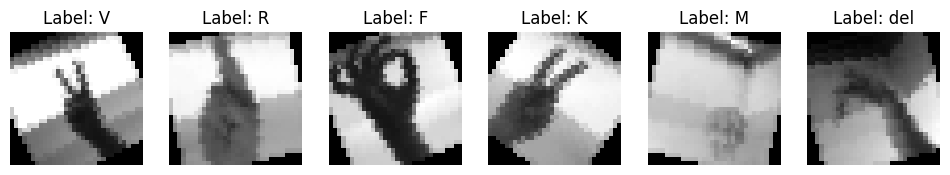

In [172]:
show_samples(train_loader)

Let's save the preprocessed images in a new directory. It will save inside datasets/preprocessed

In [190]:
output_dir = "../dataset/preprocessed/asl_alphabet"
splits = ['train', 'val', 'test']

# This creates directories for preprocessed train, val, and test
for split in splits:
    os.makedirs(output_dir, exist_ok=True)

In [191]:
from tqdm import tqdm
import pandas as pd
import csv

# Function to save a data loader to CSV
def save_loader_to_csv(loader, folder_name, split_name):
    os.makedirs(folder_name, exist_ok=True)  # Create directory if it doesn't exist
    data_list = []
    label_list = []
    
    # Initialize tqdm progress bar
    total_batches = len(loader)
    with tqdm(total=total_batches, desc=f"Saving {split_name}", unit="batch") as pbar:
        # Iterate through the loader and collect data
        for data, labels in loader:
            data_list.append(data.numpy())  # Convert tensor to numpy array
            label_list.append(labels.numpy())
            pbar.update(1)  # Update progress bar for each batch

    # Stack all batches into one array
    data_array = np.vstack(data_list)  # Shape: (total_samples, channels, height, width)
    label_array = np.concatenate(label_list)  # Shape: (total_samples,)

    # Reshape the data array to have one row per sample (flatten the image)
    data_flattened = data_array.reshape(data_array.shape[0], -1)

    # Combine data and labels into a single DataFrame
    df = pd.DataFrame(data_flattened)
    df['label'] = label_array

    # Save the dataframe to CSV
    csv_path = os.path.join(folder_name, f"{split_name}.csv")
    df.to_csv(csv_path, index=False)
    print(f"{split_name} saved to {csv_path}")

In [192]:
# Save the loaders
save_loader_to_csv(train_loader, output_dir, 'train')
save_loader_to_csv(val_loader, output_dir, 'val')
save_loader_to_csv(test_loader, output_dir, 'test')

Saving train: 100%|██████████| 544/544 [02:49<00:00,  3.20batch/s]


train saved to ../dataset/preprocessed/asl_alphabet/train.csv


Saving val: 100%|██████████| 68/68 [00:18<00:00,  3.72batch/s]


val saved to ../dataset/preprocessed/asl_alphabet/val.csv


Saving test: 100%|██████████| 68/68 [00:15<00:00,  4.34batch/s]


test saved to ../dataset/preprocessed/asl_alphabet/test.csv
